In [7]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [2]:
!ls

C&D
Data
INFO6101_project_details.docx
Intro to Python I solutions.ipynb
Intro to Python I.ipynb
Intro to Python II solutions.ipynb
Intro to Python II.ipynb
Intro to Python III solutions.ipynb
Intro to Python III.ipynb
Intro to Python IV solutions.ipynb
Intro to Python IV.ipynb
Intro to Python V solutions.ipynb
Intro to Python VI.ipynb
Intro to Python VII.ipynb
Polynomial regression play.ipynb
Progression towards data analytics...regression statistics.ipynb
Project_details.docx
Python_Lesson_II.pptx
Wage.csv


In [3]:
path = %pwd

In [6]:
ad_df = pd.read_csv(f'{path}/Data/Advertising.csv',index_col =0 )
ad_df.head(n = 3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


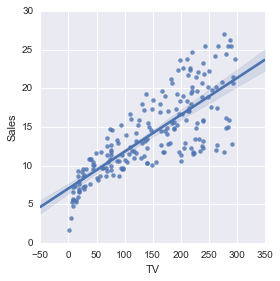

In [3]:
sns.pairplot(ad_df,x_vars = "TV",y_vars = "Sales",kind = 'reg',size = 4)
sns.plt.show()

In [5]:
tv_model = smf.ols(formula = 'Sales ~ TV',data = ad_df)
res = tv_model.fit()

In [6]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           1.47e-42
Time:                        10:47:36   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
predictions = res.fittedvalues

In [8]:
residuals = res.resid

In [9]:
pred_resid = pd.DataFrame({"Fitted values": predictions,"Residuals": residuals})

In [10]:
pred_resid.head()

,Fitted values,Residuals
1,17.970775,4.129225
2,9.147974,1.252026
3,7.850224,1.449776
4,14.234395,4.265605
5,15.627218,-2.727218


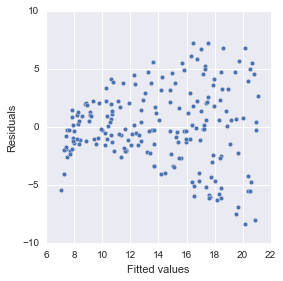

In [11]:
sns.pairplot(pred_resid,x_vars = "Fitted values", y_vars = "Residuals", size = 4)
sns.plt.show()

In [12]:
x_resid = pd.DataFrame({"TV budget":ad_df["TV"],"Residuals": pred_resid["Residuals"]})

In [13]:
x_resid.head()

,Residuals,TV budget
1,4.129225,230.1
2,1.252026,44.5
3,1.449776,17.2
4,4.265605,151.5
5,-2.727218,180.8


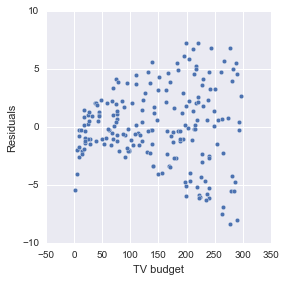

In [14]:
sns.pairplot(x_resid,x_vars = "TV budget",y_vars = "Residuals", size = 4)
sns.plt.show()

In [15]:
# Square residuals and add them. This will give you Residual sum of squares

rss_score = 0
for value in x_resid["Residuals"]:
    val_square = value * value
    rss_score = rss_score + val_square
#resids_sq_sum
rss_score
    
    

2102.5305831313503

In [17]:
# Calculate residual standard error
rse = (rss_score/198)**0.5
rse

3.2586563686504619

In [18]:
ad_df["Sales"].mean()

14.022500000000003

In [19]:
# Calculate TSS
tss_score = 0
for i in ad_df["Sales"]:
    devia = (i - ad_df['Sales'].mean())**2
    tss_score = tss_score + devia
tss_score

5417.1487499999976

In [20]:
# Now we know TSS and RSS, calculate Rsquared

r_squared = (tss_score - rss_score)/tss_score
r_squared

0.61187505085007099

In [21]:
radio_model = smf.ols("Sales ~ Radio", ad_df)
radio_res = radio_model.fit()
radio_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           4.35e-19
Time:                        10:48:39   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000         8.202    10.422
Radio          0.2025      0.020      9.921      0.000         0.162     0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
npaper_model = smf.ols("Sales ~ Newspaper", ad_df)
npaper_res = npaper_model.fit()
npaper_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 03 Apr 2017   Prob (F-statistic):            0.00115
Time:                        10:48:42   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000        11.126    13.577
Newspaper      0.0547      0.017      3.300      0.001         0.022     0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
tv_radio_model = smf.ols("Sales ~ TV + Radio",ad_df)
tv_radio_res = tv_radio_model.fit()
tv_radio_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           4.83e-98
Time:                        10:48:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
new_data = np.array([250,40])
new = tv_radio_res.predict(new_data)

In [25]:
comb_model = smf.ols("Sales ~ TV + Radio + Newspaper", ad_df)
comb_res = comb_model.fit()
comb_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           1.58e-96
Time:                        10:49:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
ad_df["Multivariate Residuals"] = pd.DataFrame(comb_res.resid)


In [27]:
ad_df.head()

,TV,Radio,Newspaper,Sales,Multivariate Residuals
1,230.1,37.8,69.2,22.1,1.576026
2,44.5,39.3,45.1,10.4,-1.937855
3,17.2,45.9,69.3,9.3,-3.007671
4,151.5,41.3,58.5,18.5,0.902170
5,180.8,10.8,58.4,12.9,-0.288672


In [28]:
def square_func(x):
    return x*x

ad_df["Squared residuls"] = ad_df["Multivariate Residuals"].apply(square_func)
ad_df.head()

,TV,Radio,Newspaper,Sales,Multivariate Residuals,Squared residuls
1,230.1,37.8,69.2,22.1,1.576026,2.483857
2,44.5,39.3,45.1,10.4,-1.937855,3.755281
3,17.2,45.9,69.3,9.3,-3.007671,9.046084
4,151.5,41.3,58.5,18.5,0.902170,0.813912
5,180.8,10.8,58.4,12.9,-0.288672,0.083331


In [29]:
ad_df_rss = ad_df["Squared residuls"].sum()

In [30]:
ad_df_rss

556.8252629021874

In [31]:
ad_df_rse = (ad_df_rss/198)**0.5
ad_df_rse

1.6769760888385679

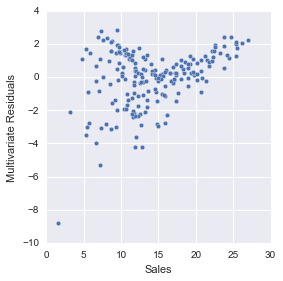

In [32]:
sns.pairplot(ad_df,x_vars = "Sales",y_vars = "Multivariate Residuals", size = 4)
sns.plt.show()

C:\Users\rharihar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


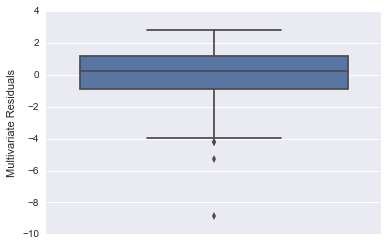

In [33]:
sorted_ad_df = ad_df.sort(columns = "Squared residuls",ascending = False)
sns.boxplot(y = "Multivariate Residuals",data = sorted_ad_df)
sns.plt.show()

In [34]:
# Is at least one variable associated with response ? Calcualte F score

f_score = ((tss_score - ad_df_rss)/3)/((ad_df_rss)/(198- 2))
f_score

570.27070365909367

In [35]:
ad_df.describe()

,TV,Radio,Newspaper,Sales,Multivariate Residuals,Squared residuls
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000
mean,147.042500,23.264000,30.554000,14.022500,2.153833e-15,2.784126
std,85.854236,14.846809,21.778621,5.217457,1.672757e+00,6.444928
min,0.700000,0.000000,0.300000,1.600000,-8.827687e+00,0.000059
25%,74.375000,9.975000,12.750000,10.375000,-8.908135e-01,0.144181
50%,149.750000,22.900000,25.750000,12.900000,2.418018e-01,1.156729
75%,218.825000,36.525000,45.100000,17.400000,1.189319e+00,3.143867
max,296.400000,49.600000,114.000000,27.000000,2.829223e+00,77.928060


In [36]:
credit_df = pd.read_csv("C:/Users/rharihar/Desktop/Stat/Credit.csv",index_col = 0)
print(credit_df.shape)
credit_df.head(n = 3)

(400, 11)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


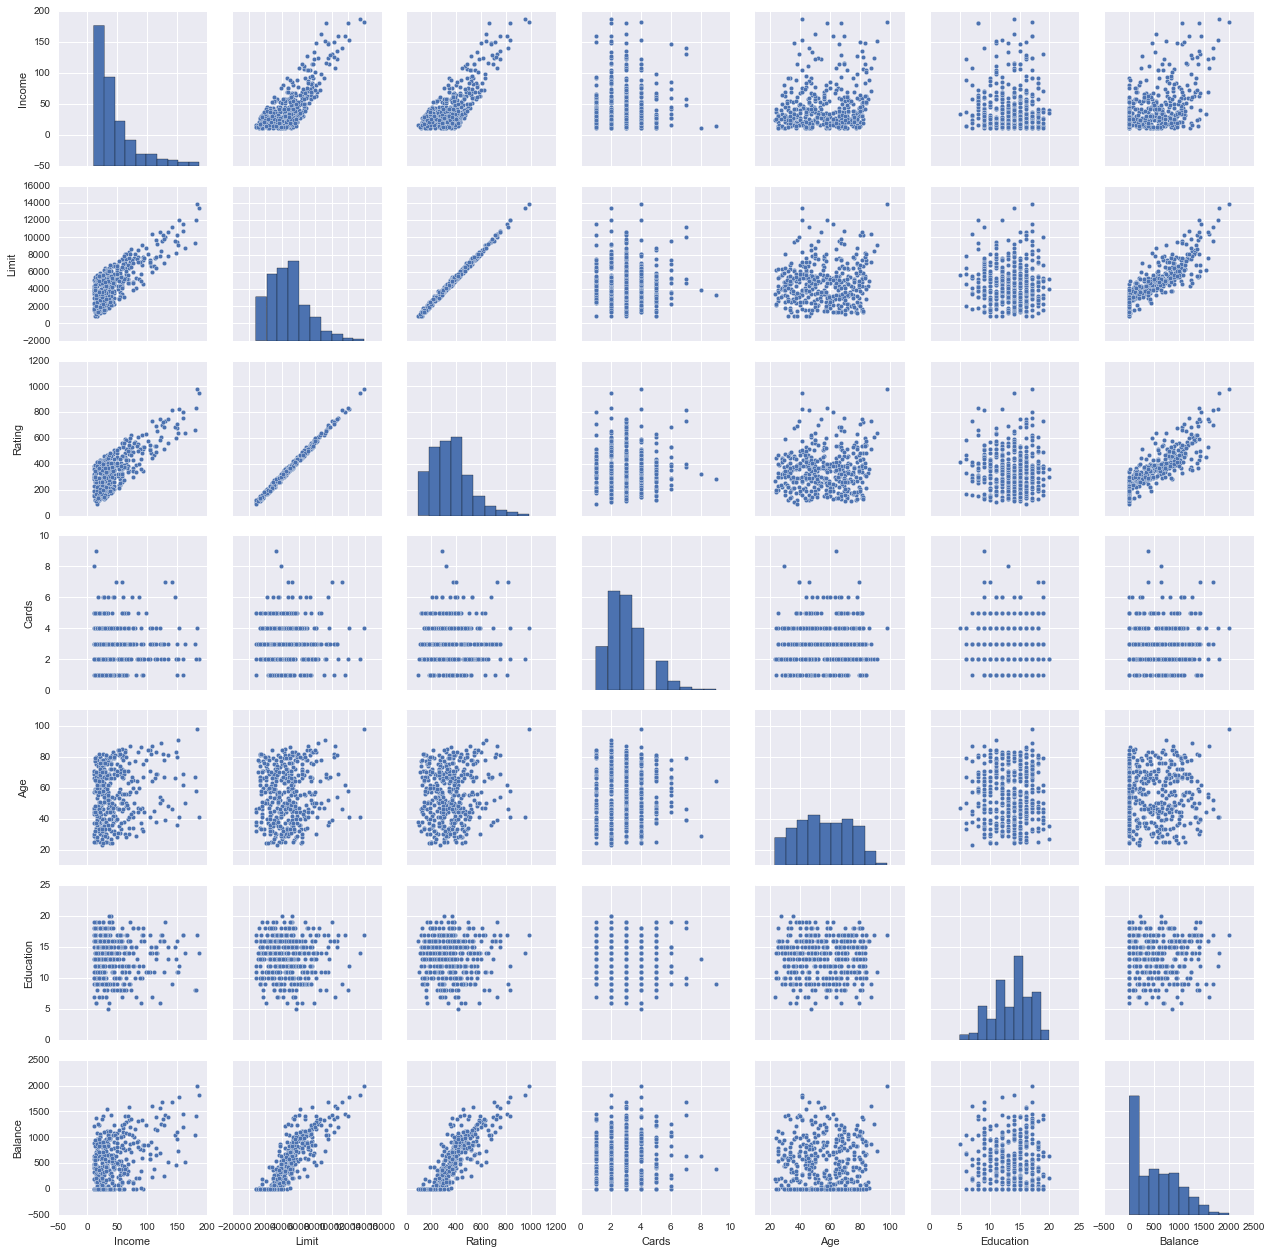

In [37]:
sns.pairplot(credit_df)
sns.plt.show()

In [38]:
gender_model = smf.ols(formula = 'Balance ~ Gender',data = credit_df)
gender_res = gender_model.fit()
gender_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Mon, 03 Apr 2017   Prob (F-statistic):              0.669
Time:                        10:49:37   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000       444.675   574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669       -70.801   110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
new_gender_model = smf.ols(formula = 'Balance ~ Education + Gender', data = credit_df)
new_gen_res = new_gender_model.fit()
new_gen_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1041
Date:                Mon, 03 Apr 2017   Prob (F-statistic):              0.901
Time:                        10:49:45   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6056.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept          525.5593    104.790      5.015      0.000       319.546   731.572
Gender[T.Female]    19.6962     46.108      0.427      0.669       -70.951   110.343
Education           -1.1700      7.382     -0.159      0.874       -15.682    13.342
==============================================================================
Omnibus:                       28.390   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.409
Skew:                           0.585   Prob(JB):                     1.12e-06
Kurtosis:                       2.474   Cond. No.                         63.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
enthnic_model = smf.ols('Balance ~ Ethnicity',credit_df)
e_model = enthnic_model.fit()
e_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Mon, 03 Apr 2017   Prob (F-statistic):              0.957
Time:                        10:49:49   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000       439.939   622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774      -146.515   109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826      -123.935    98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
inter_model_1 = smf.ols("Sales ~ TV + Radio + TV*Radio", ad_df)
inter_res_1 = inter_model_1.fit()
inter_res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 03 Apr 2017   Prob (F-statistic):          6.68e-146
Time:                        10:49:53   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000         6.261     7.239
TV             0.0191      0.002     12.699      0.000         0.016     0.022
Radio          0.0289      0.009      3.241      0.001         0.011     0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000         0.001     0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Calculate rse for the interaction model
ad_df["Inter Resid"] = inter_res_1.resid
ad_df["Inter Resid Squared"] = (inter_res_1.resid)**2
ad_df.head()

,TV,Radio,Newspaper,Sales,Multivariate Residuals,Squared residuls,Inter Resid,Inter Resid Squared
1,230.1,37.8,69.2,22.1,1.576026,2.483857,0.413610,0.171073
2,44.5,39.3,45.1,10.4,-1.937855,3.755281,-0.234546,0.055012
3,17.2,45.9,69.3,9.3,-3.007671,9.046084,0.038786,0.001504
4,151.5,41.3,58.5,18.5,0.902170,0.813912,0.865892,0.749769
5,180.8,10.8,58.4,12.9,-0.288672,0.083331,0.263081,0.069212


In [49]:
inter_mod_rss  = ad_df["Inter Resid Squared"].sum()
inter_mod_rss

174.48338262772717

In [50]:
inter_mod_rse = (inter_mod_rss/198)**0.5
inter_mod_rse

0.9387380919034559

In [51]:
credit_model_2 = smf.ols(formula = 'Balance ~ Limit + Age', data = credit_df)
credit_model_2_res = credit_model_2.fit()
credit_model_2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Thu, 06 Apr 2017   Prob (F-statistic):          3.52e-120
Time:                        10:26:55   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000      -259.576   -87.246
Limit          0.1734      0.005     34.496      0.000         0.163     0.183
Age           -2.2915      0.672     -3.407      0.001        -3.614    -0.969
==============================================================================
Omnibus:                       19.180   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.162
Skew:                           0.382   Prob(JB):                     1.26e-06
Kurtosis:                       4.022   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
credit_model_3 = smf.ols(formula = 'Balance ~ Rating + Limit', data = credit_df)
credit_model_3_res =  credit_model_3.fit()
credit_model_3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Thu, 06 Apr 2017   Prob (F-statistic):          7.57e-119
Time:                        10:28:03   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000      -466.505  -288.569
Rating         2.2017      0.952      2.312      0.021         0.330     4.074
Limit          0.0245      0.064      0.384      0.701        -0.101     0.150
==============================================================================
Omnibus:                       23.153   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.187
Skew:                           0.394   Prob(JB):                     5.10e-09
Kurtosis:                       4.293   Cond. No.                     2.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
corr_matrix = credit_df.corr()
corr_matrix

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


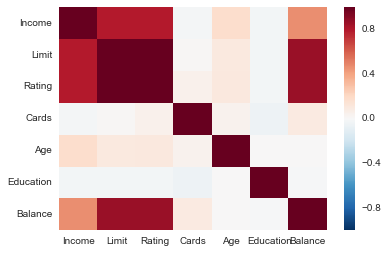

In [54]:
sns.heatmap(corr_matrix)
sns.plt.show()